<a href="https://colab.research.google.com/github/BastianAndresDev/rainfall_prediction/blob/main/RainfallPredictionAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos las librerias necesarias para realizar la investigación




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#balancear los datos
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Fase 1: Comprension del negocio

## Identificacion de objetivos claves y KPIs relevantes

1.   Objetivo: Mejorar la comprensión del clima y sus impactos en la sociedad y la economía australian

  *   KPIs:
  *   Precisión de los modelos de predicción meteorológica.
  *   Cobertura geográfica de los datos meteorológicos recopilados.
  *   Número de fenómenos naturales extremos pronosticados con precisión.


2.   Objetivo: Optimizar la gestión de recursos naturales y la planificación urbana en Australia.

  *   KPIs:
  *   Eficiencia en el uso del agua y manejo de la sequía.
  *   Tasa de utilización de energías renovables en zonas urbanas
  *   Eficiencia en la gestión de residuos y reducción de la contaminación ambiental.


3.    Fomentar la innovación tecnológica en el sector agrícola y agroalimentario.

  *   KPIs:
  *   Impacto de la información meteorológica en la productividad agrícola.
  *   Implementación de tecnologías de agricultura de precisión.
  *   Mejora en la resiliencia de los cultivos ante condiciones climáticas extremas.






In [ ]:
#Nos conectamos al drive para tener el dataset en la nube
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos el dataset previamente alojado en una carpeta en drive
dfAUS = pd.read_csv('drive/MyDrive/mineria/weatherAUS.csv')

# FASE 2: Comprensión de los datos

Visualizamos la naturaleza de los datos. También podemos ver:


1.   La cantidad de datos totales de cada columna
2.   La media
3.   Desviación estándar
4.   Valores minimos y máximos de cada columna
5.   Percentiles
6.   Los tipos de datos de las columnas





In [ ]:
#Visualizamos las filas y columnas de nuestro dataset.
dfAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
# Identificar los tipos de datos de cada columna
dfAUS.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
#Visualizamos la cantidad de columnas y filas que tiene nuestro dataset
#142193 Filas #24 Columnas

dfAUS.shape

(142193, 24)

In [ ]:
#Visualizamos la cantidad total de columnas, junto con la cantidad de datos NO NULOS y el tipo de datos que tiene el dataset
dfAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
dfAUS.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [ ]:
#Visualizamos el nombre de las columnas de nuestro dataset
dfAUS.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
#Buscamos la cantidad TOTAL de valores nulos por cada columna, esto para saber si debemos utilizar alguna técnica si es que la columna es de utilidad para nuestra investigación
#o borrarlos directamente en el caso de que no lo sean,
print("Cantidad de valores nulos por columnas:")
(
    dfAUS
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

Cantidad de valores nulos por columnas:


Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

## Insight relevantes:

*   El clima en Australia es templado, con temperaturas medias relativamente suaves y precipitaciones moderadas.
*   Hay una variabilidad significativa en el clima de Australia, con temperaturas que oscilan entre los 0 y los 50 grados Celsius y precipitaciones que oscilan entre los 0 y los 1000 mm.
*   El clima de Australia está influenciado por una variedad de factores, incluyendo su ubicación geográfica, su proximidad al océano y la presencia de cordilleras.







## Balanceado de datos

In [ ]:
# Explorar la naturaleza de los datos categóricos
dfAUS['RainToday'].value_counts()

RainToday
No     109332
Yes     31455
Name: count, dtype: int64

In [ ]:
#Pasamos nuestras variables a categoricas para poder analizarlas mejor
dfAUS['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
dfAUS['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

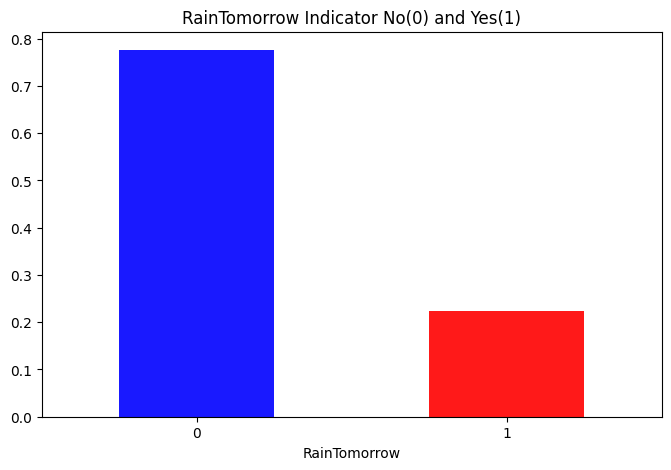

In [ ]:
fig = plt.figure(figsize = (8,5))
dfAUS.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['blue','red'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1)')
plt.show()

como se puede ver en el grafico los datos estan muy desbalanceados por lo que tenemos que aplicar una tecnica para balancear estos.

Y para esto ocuparemos SMOTE  ya que a nuestro parecer es la mejor ya que no duplica los datos (esto nos llevaria a un sobreajuste en algunos modelos) sino que crea datos sinteticos a partir de los datos existentes.


In [ ]:
# Separar los datos en las clases "No" y "Yes"
no = dfAUS[dfAUS.RainTomorrow == 0]
yes = dfAUS[dfAUS.RainTomorrow == 1]

In [ ]:
# Aplicamos SMOTE para generar ejemplos sintéticos en la clase minoritaria ("Yes")
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)

In [ ]:
# Combina los datos originales de la clase "No" con los ejemplos sintéticos de la clase "Yes"
dfoversampled = pd.concat([no, yes_oversampled])

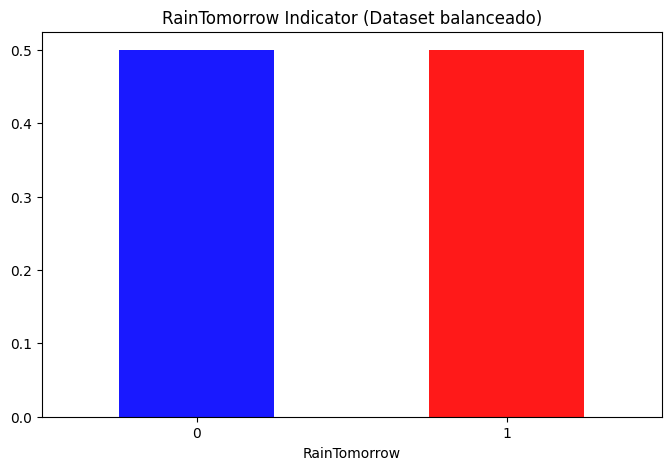

In [ ]:
# Visualiza el conjunto de datos balanceado
fig = plt.figure(figsize=(8, 5))
dfoversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['blue', 'red'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator (Dataset balanceado)')
plt.show()

In [ ]:
dfoversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130416,2010-06-08,Launceston,1.1,11.8,0.4,NaN,NaN,WNW,13.0,NaN,...,98.0,1020.1,1013.3,NaN,NaN,4.0,9.5,0.0,8.8,1
114384,2016-08-08,PearceRAAF,9.6,14.8,11.8,NaN,4.3,W,69.0,WNW,...,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,5.4,1
84962,2009-03-18,Cairns,24.8,31.5,0.0,5.4,3.4,SE,48.0,SSE,...,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,9.8,1
54992,2012-08-17,Ballarat,4.2,7.9,11.4,NaN,NaN,SW,63.0,NNW,...,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,18.4,1


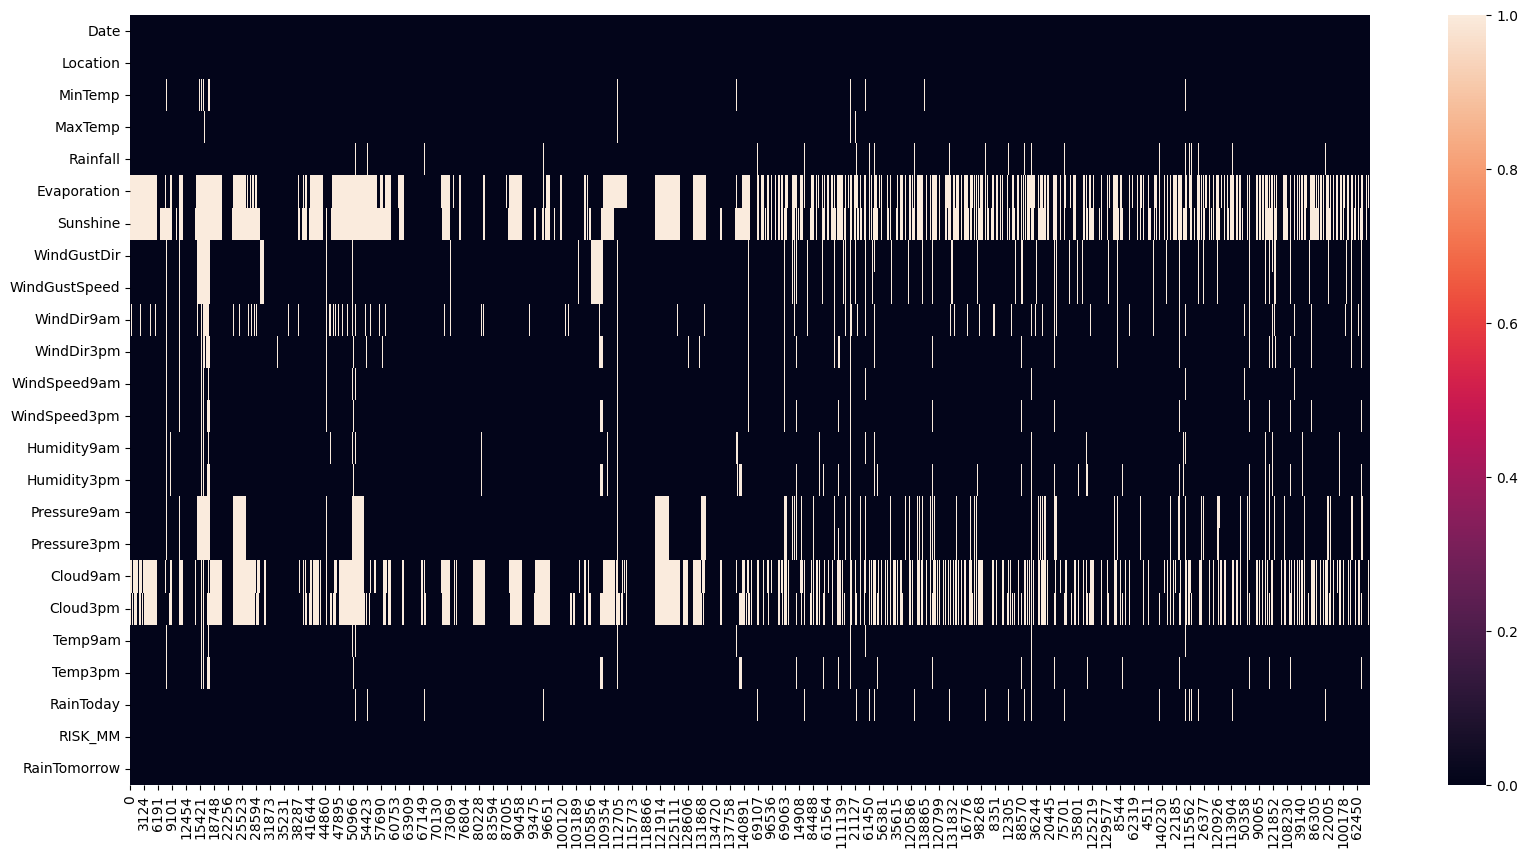

In [ ]:
(
    dfoversampled
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
              sns.heatmap(
                data= df
            )
        )
    )
)
plt.rcParams['figure.figsize'] = (20, 10)

# FASE 3: Preparacion de datos

In [ ]:
#calculamos la cantidad de valores nulos (o faltantes) en cada columna del DataFrame balanceado y los ordenamos de forma descendente
total = dfoversampled.isnull().sum().sort_values(ascending=False)
percent = (dfoversampled.isnull().sum()/dfoversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [ ]:
dfoversampled.select_dtypes(include=['object']).columns


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
#Lo que se busca en esta celda es remplazar los valores nulos o faltantes con los valores mas comunes de las columnas
dfoversampled['Date'] = dfoversampled['Date'].fillna(dfoversampled['Date'].mode()[0])
dfoversampled['Location'] = dfoversampled['Location'].fillna(dfoversampled['Location'].mode()[0])
dfoversampled['WindGustDir'] = dfoversampled['WindGustDir'].fillna(dfoversampled['WindGustDir'].mode()[0])
dfoversampled['WindDir9am'] = dfoversampled['WindDir9am'].fillna(dfoversampled['WindDir9am'].mode()[0])
dfoversampled['WindDir3pm'] = dfoversampled['WindDir3pm'].fillna(dfoversampled['WindDir3pm'].mode()[0])

In [ ]:
dfoversampled['Location']

0             Albury
1             Albury
2             Albury
3             Albury
4             Albury
             ...    
130416    Launceston
114384    PearceRAAF
84962         Cairns
54992       Ballarat
26599       Richmond
Name: Location, Length: 220632, dtype: object

In [ ]:
numerical_columns = dfoversampled.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
#creamos un diccionario para almacenar los codificadores
lencoders = {}

In [ ]:
# Iterar sobre las columnas categóricas
for col in dfoversampled.select_dtypes(include=['object']).columns:
    # Crear una instancia de LabelEncoder para la columna actual
    lencoders[col] = LabelEncoder()

    # Transformar los valores categóricos en valores enteros
    dfoversampled[col] = lencoders[col].fit_transform(dfoversampled[col])

In [ ]:
#aseguramos que los valores faltantes en las columnas numéricas se llenen con la media de cada columna
for col in numerical_columns:
    imputer = SimpleImputer(strategy='mean')
    dfoversampled[col] = imputer.fit_transform(dfoversampled[[col]])

In [ ]:
dfoversampled.isna().mean()

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RISK_MM          0.0
RainTomorrow     0.0
dtype: float64

Ahora que ya rellenamos los valores nulos y/o faltantes crearemos una copia de nuestro dataset para poder trabjar con este con el fin de no alterar los datos originales

In [ ]:
dfimputado = dfoversampled.copy(deep=True) #indicamos que haga una copia profunda de nuestro dataset dfoversampled

Ahora, como ya tenemos los datos limpios y balanceados, sacaremos nuevamente las medidas de tendencia central, como la media, moda, mediana, varianza, rango y desviación estándar. Para el rango, la varianza y la desviación estandar utilizaremos las variables: MinTemp y MaxTemp.

In [ ]:
dfimputado.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,220632.0,1918.667600,885.032365,0.0,1153.000000,1931.000000,2688.00000,3435.0
Location,220632.0,23.698167,14.185267,0.0,11.000000,24.000000,36.00000,48.0
MinTemp,220632.0,12.522257,6.373657,-8.5,8.000000,12.300000,17.20000,33.9
MaxTemp,220632.0,22.454739,7.105238,-4.8,17.200000,21.800000,27.40000,48.1
Rainfall,220632.0,3.674979,11.052036,0.0,0.000000,0.000000,2.60000,371.0
Evaporation,220632.0,5.131770,2.997968,0.0,4.000000,5.131770,5.13177,145.0
Sunshine,220632.0,6.496757,2.852916,0.0,6.496757,6.496757,7.20000,14.5
WindGustDir,220632.0,8.220766,4.643051,0.0,4.000000,9.000000,13.00000,15.0
WindGustSpeed,220632.0,42.048602,14.109869,6.0,33.000000,41.000000,50.00000,135.0
WindDir9am,220632.0,7.103684,4.489049,0.0,3.000000,7.000000,11.00000,15.0


In [ ]:
#Rango de MinTemp
rango = dfimputado['MinTemp'].max() - dfimputado['MinTemp'].min()

print("El rango de MinTemp es : ", rango)

#Podemos entender que rango es la diferencia entre el valor maximo y minimo de nuestra muestra, entonces es la variación de la temperatura.

El rango de MinTemp es :  42.4


In [ ]:
#Rango de MaxTemp
rango = dfimputado['MaxTemp'].max() - dfimputado['MaxTemp'].min()

print("El rango de MinMaxTempTemp es : ", rango)

#Podemos entender que rango es la diferencia entre el valor maximo y minimo de nuestra muestra, entonces es la variación de la temperatura.

El rango de MinMaxTempTemp es :  52.9


In [ ]:
#Varianza de MinTemp
dfimputado['MinTemp'].var()

#Ya que tenemos una varianza de 40%, entendemos que hay una gran dispersión de datos, por ende, hay una variabilidad considerable en los datos

40.623498926766665

In [ ]:
#Varianza de MaxTemp
dfimputado['MaxTemp'].var()

#Ya que tenemos una varianza de 50%, entendemos que el conjunto de datos están moderadamente dispersos con respecto a su media. Esto es común

50.4844123399651

In [ ]:
#Desviación estándar de MinTemp
dfimputado['MinTemp'].var()

40.623498926766665

In [ ]:
#Desviación estándar de MaxTemp
dfimputado['MaxTemp'].var()

50.4844123399651

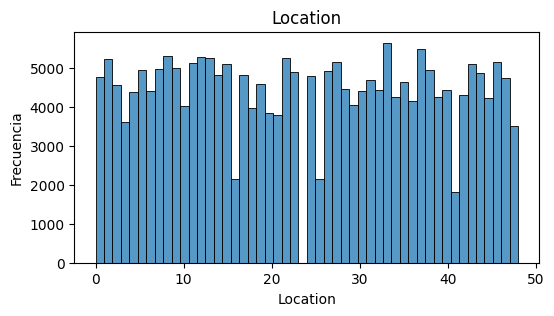

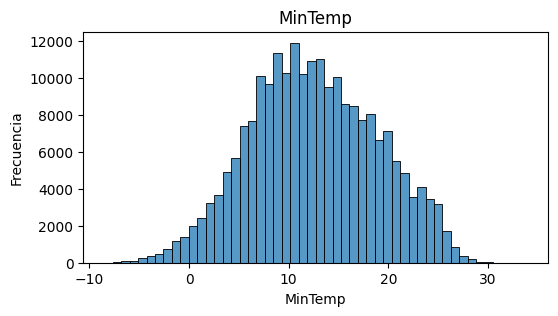

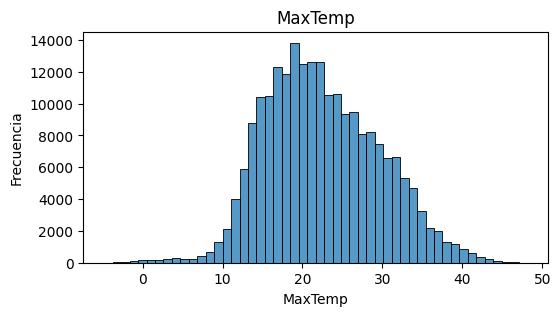

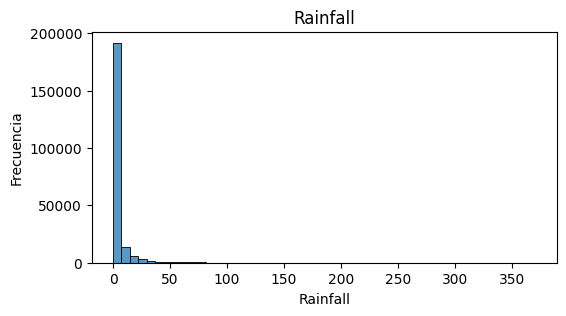

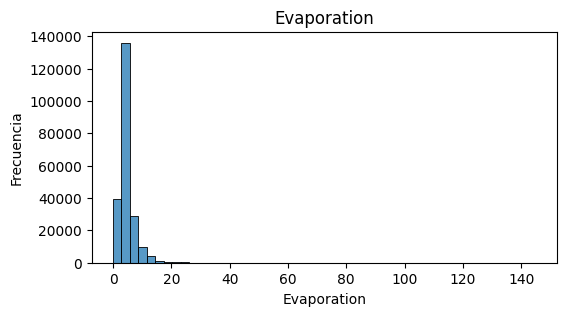

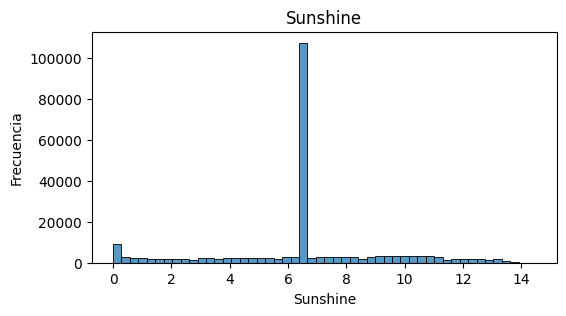

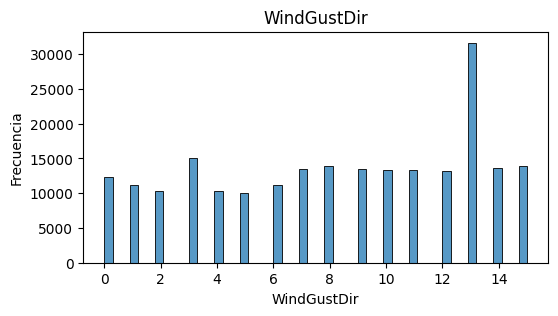

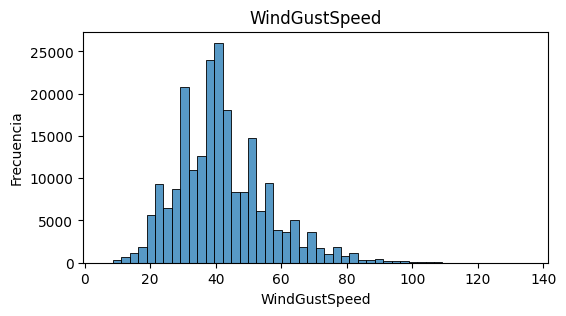

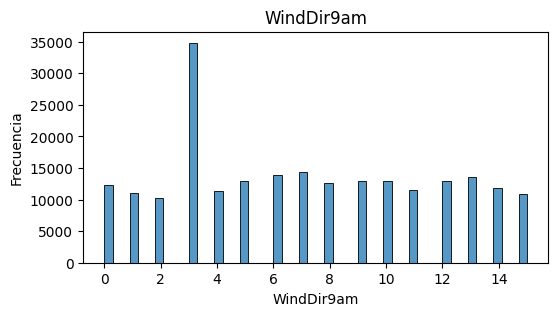

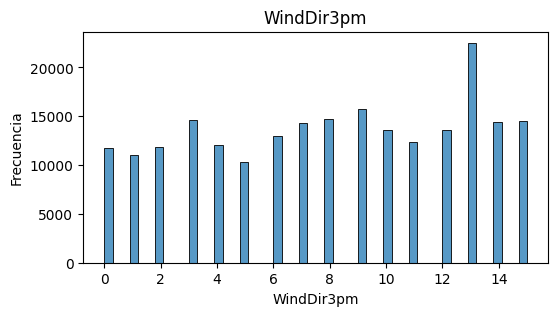

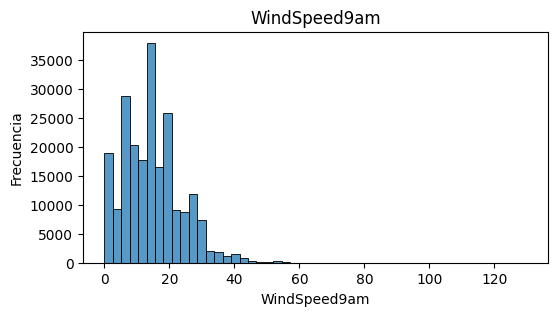

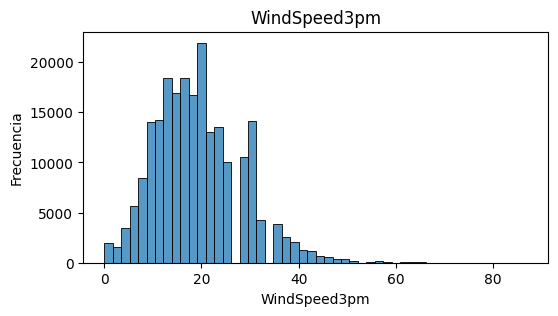

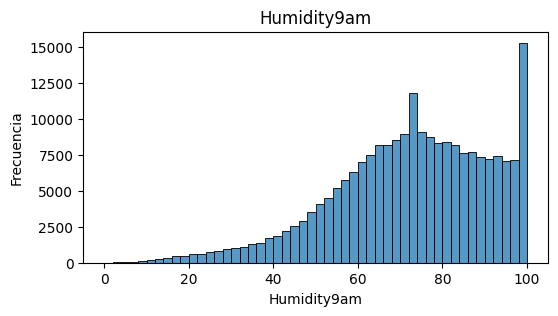

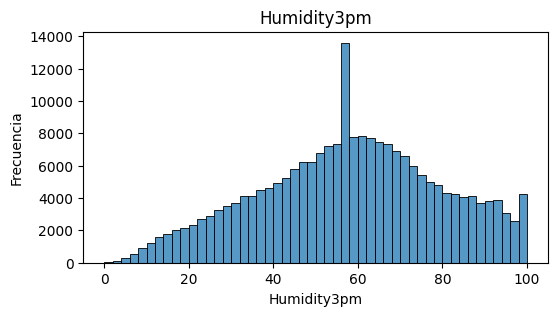

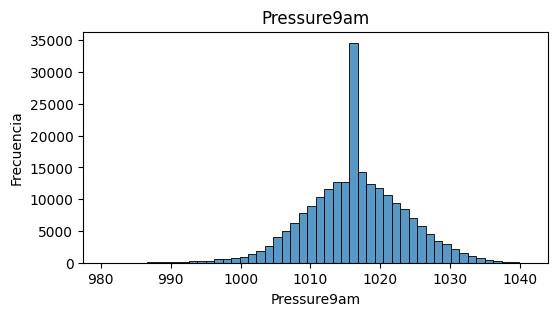

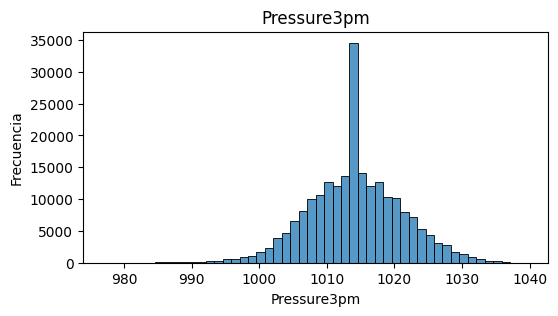

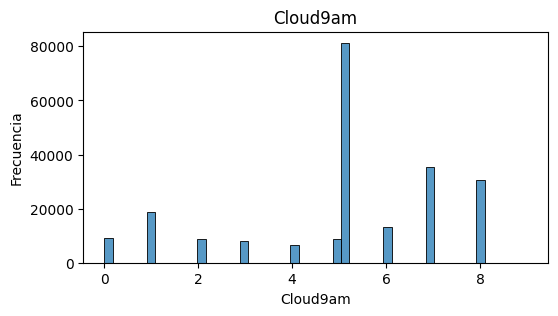

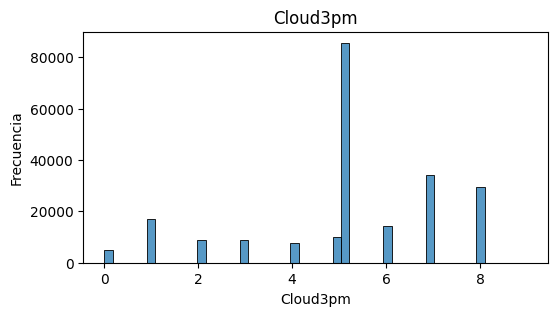

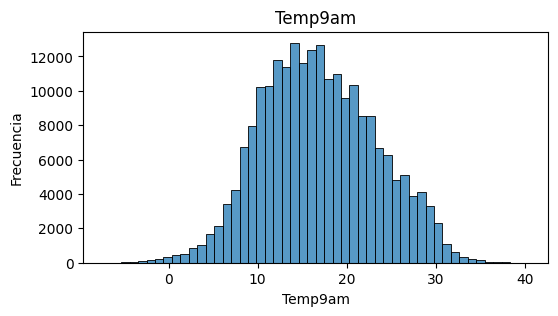

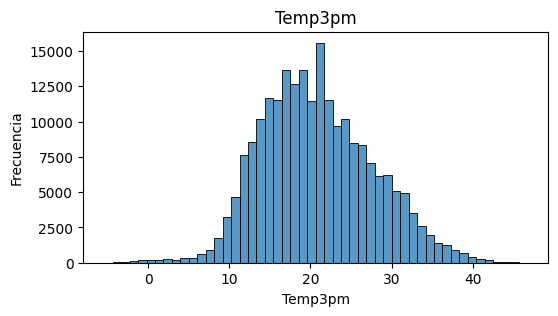

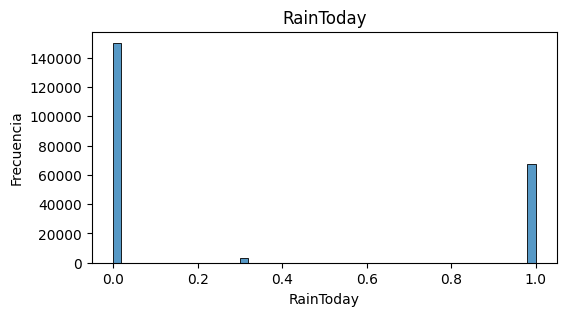

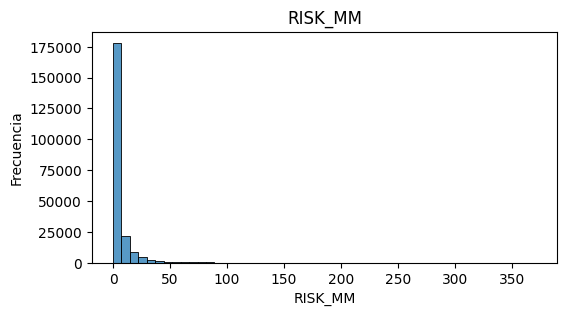

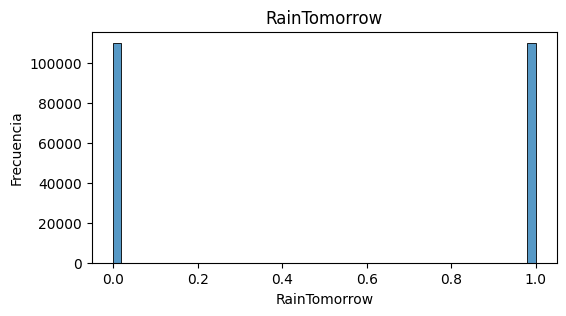

In [ ]:
#Reqalizamos un histograma con todas las variables, esto para ver la cantidad de datos que se tienen y como estan divididos
import seaborn as sb
import matplotlib.pyplot as plt

for columna in dfimputado.drop(dfimputado[['Date']], axis=1):
    plt.figure(figsize=(6, 3))
    sb.histplot(dfimputado[columna], bins=50)
    plt.title(columna)
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

<Axes: >

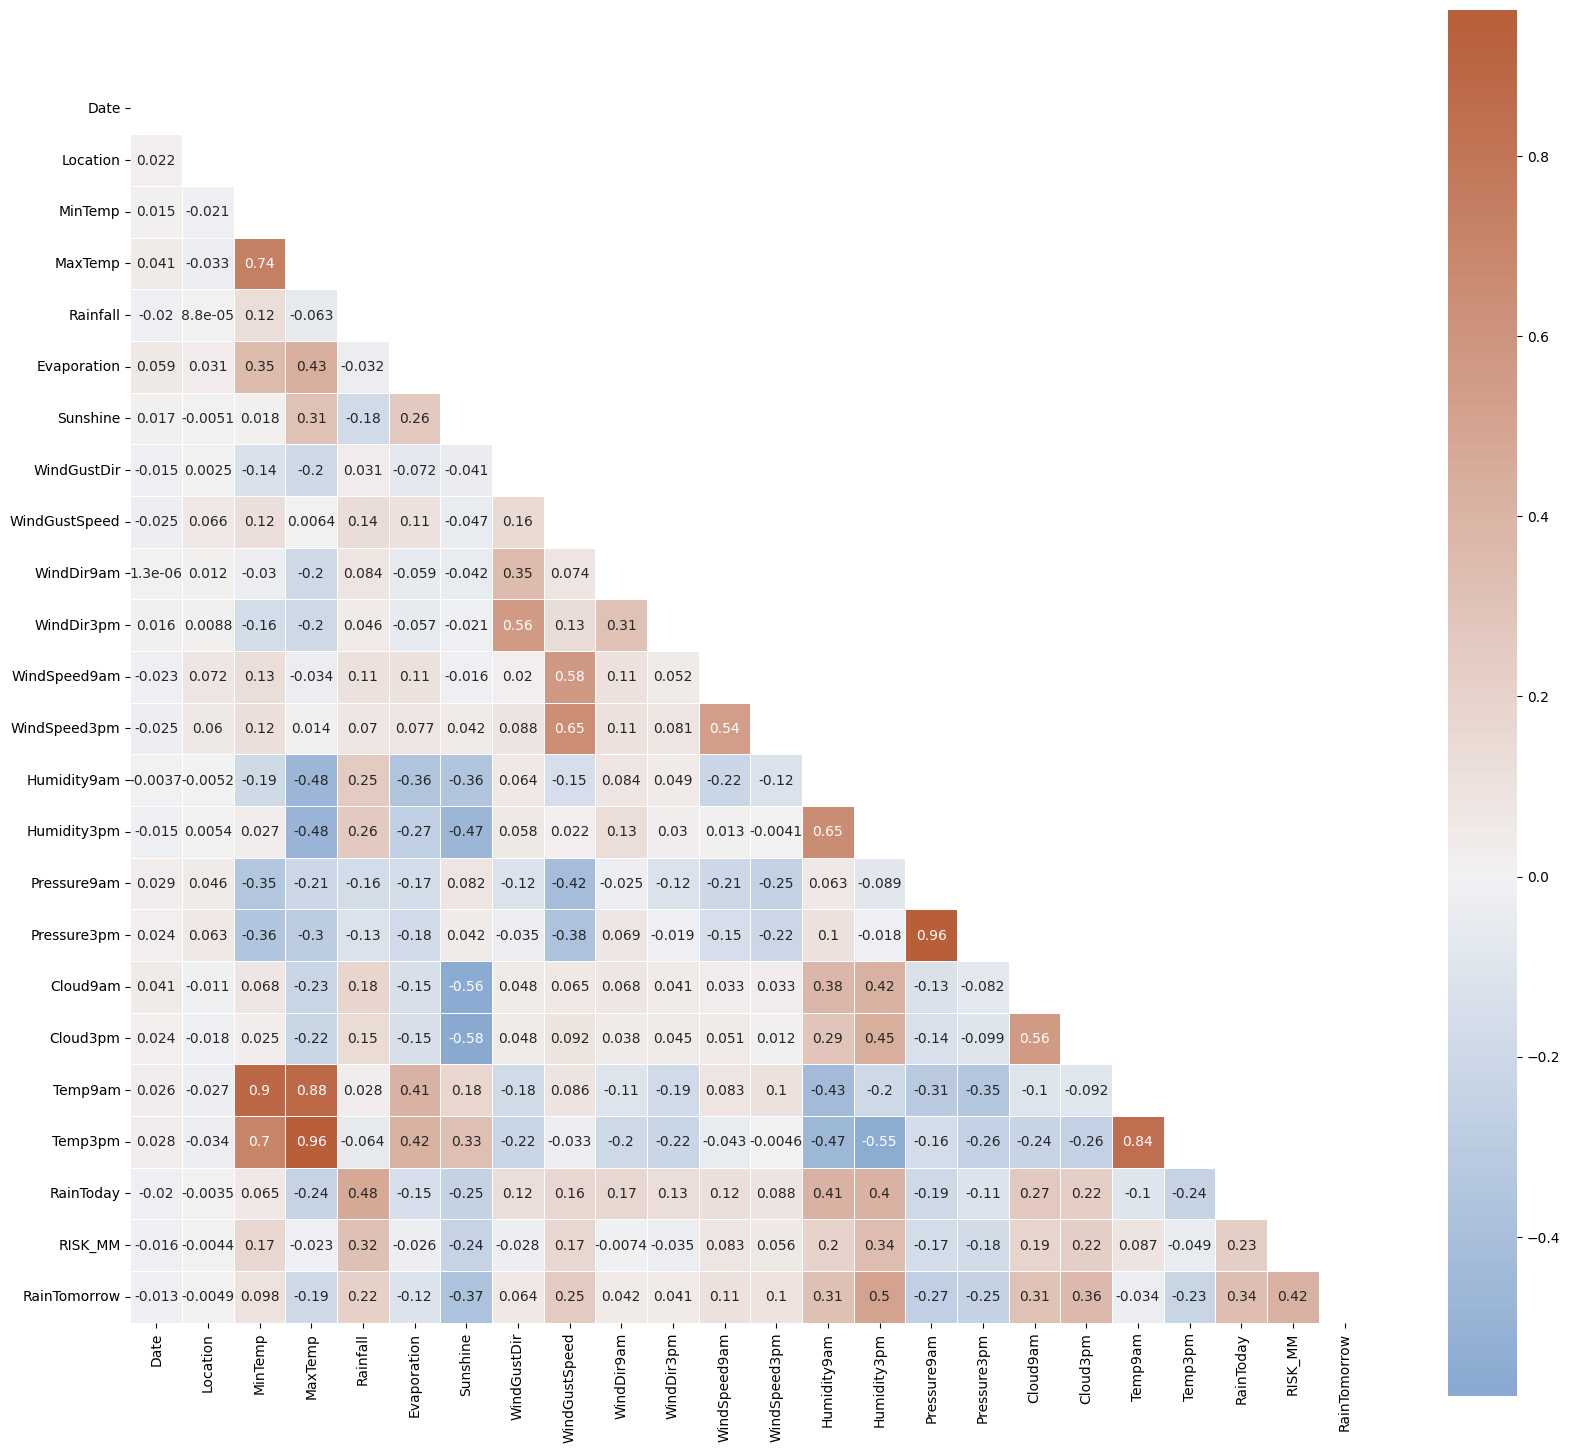

In [ ]:
#BUSCAMOS LA CORRELACIÓN ENTRE NUESTRAS VARIABLES.
corr = dfimputado.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

Al tener la correlación, podemos identificar las siguientes tendencias
Teniendo en cuenta que: 1 es una alta correlación y 0 es inexistente, 0.6-0.65 es una correlación aceptable para este caso


*   La MinTemp tiene una alta correlación(0.9) con la temperatura de las 9 AM
*   La MinTemp tiene una correlación media(0.7) con la temperatura a las 3 PM
*   La MaxTemp tiene una alta correlación(0.88) con la temperatura de las 9 AM
*   La MaxTemp tiene una alta correlación(0.98) con la temperatura de las 3 PM
*   La Pressure9Am tiene una correlación alta (0.96) con La pressure3 PM
*   La temp9Am tiene una alta correlacion (0.84) con la Temp3PM




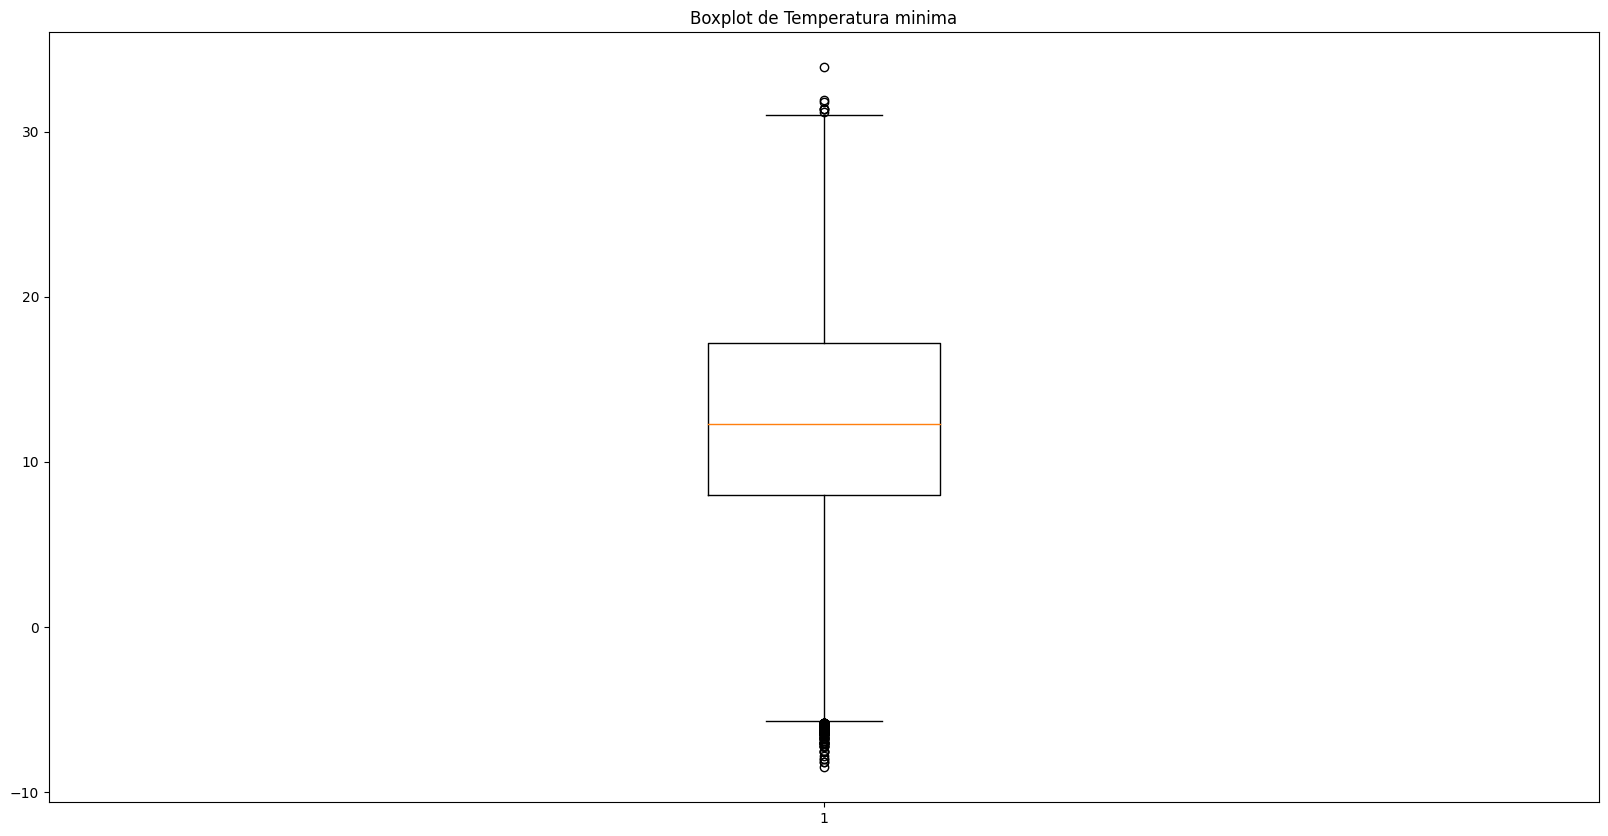

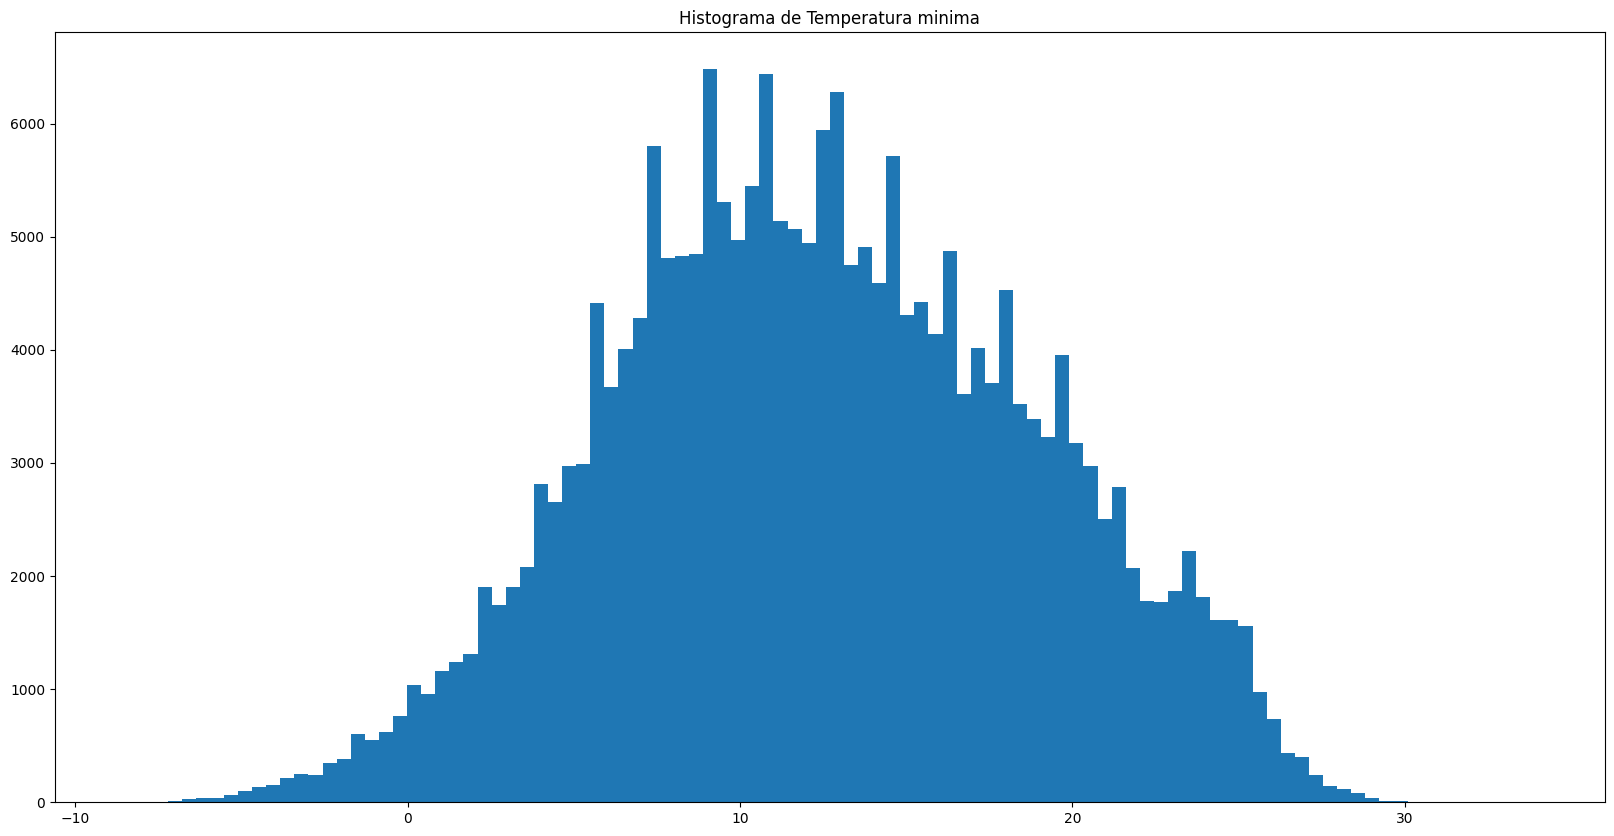

In [ ]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')



# Boxplot con matplotlib
plt.boxplot(dfimputado['MinTemp'])
plt.title('Boxplot de Temperatura minima')
plt.show()


# Histograma con matplotlib
plt.hist(dfimputado['MinTemp'], bins=100)
plt.title('Histograma de Temperatura minima')
plt.show()

Al ver nuestro gráfico de valores atipicos, podemos observar que la temperatura minima promedio va desde los 7-8 grados hasta los 16-18 grados. El resto vienen a ser valores atipicos que no ocurren con tanta frecuencia

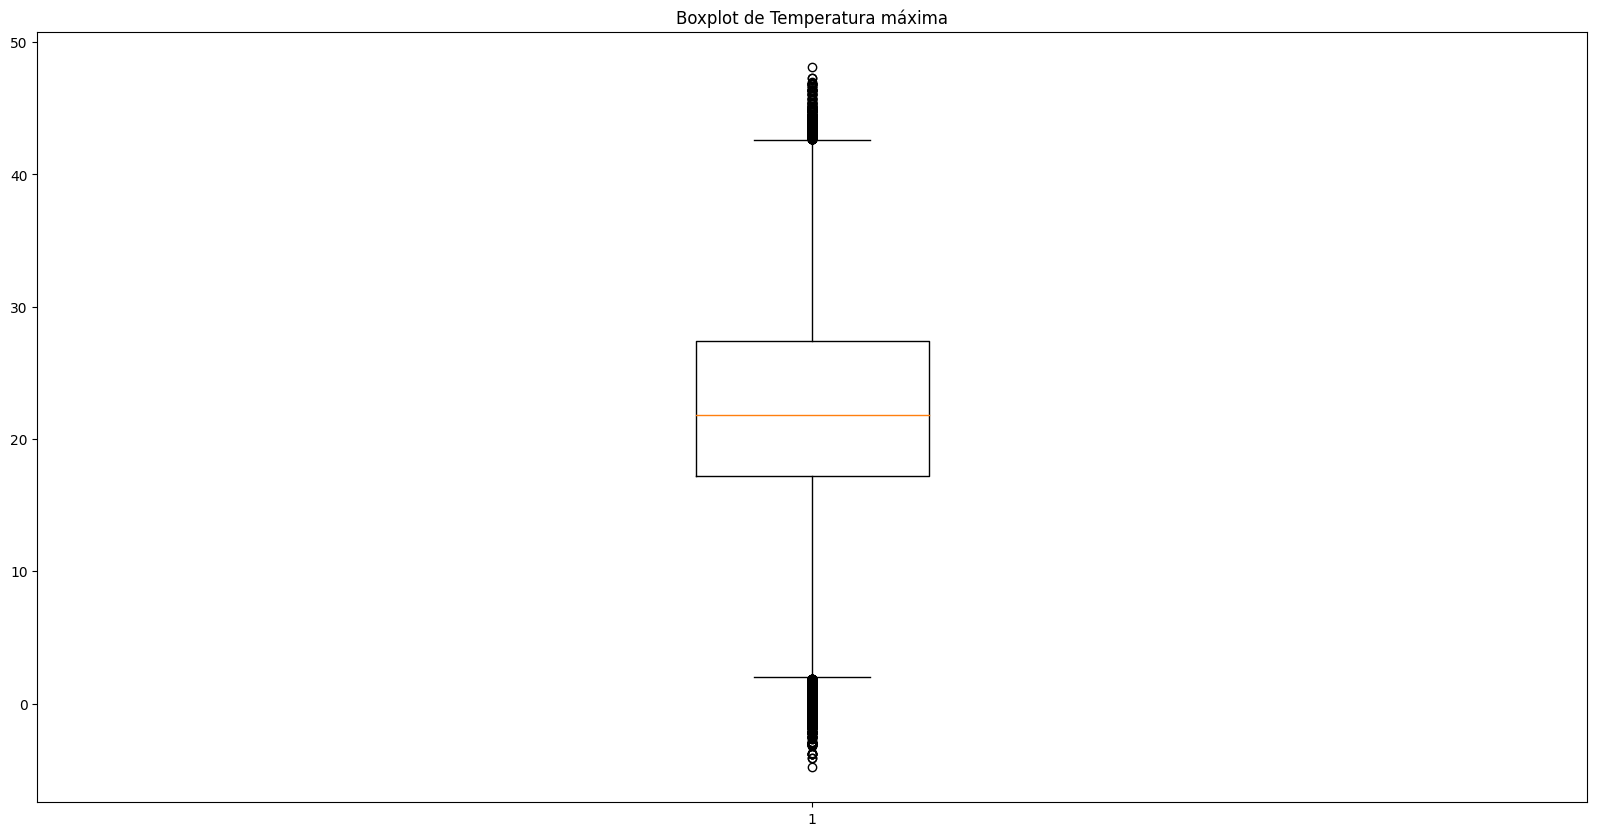

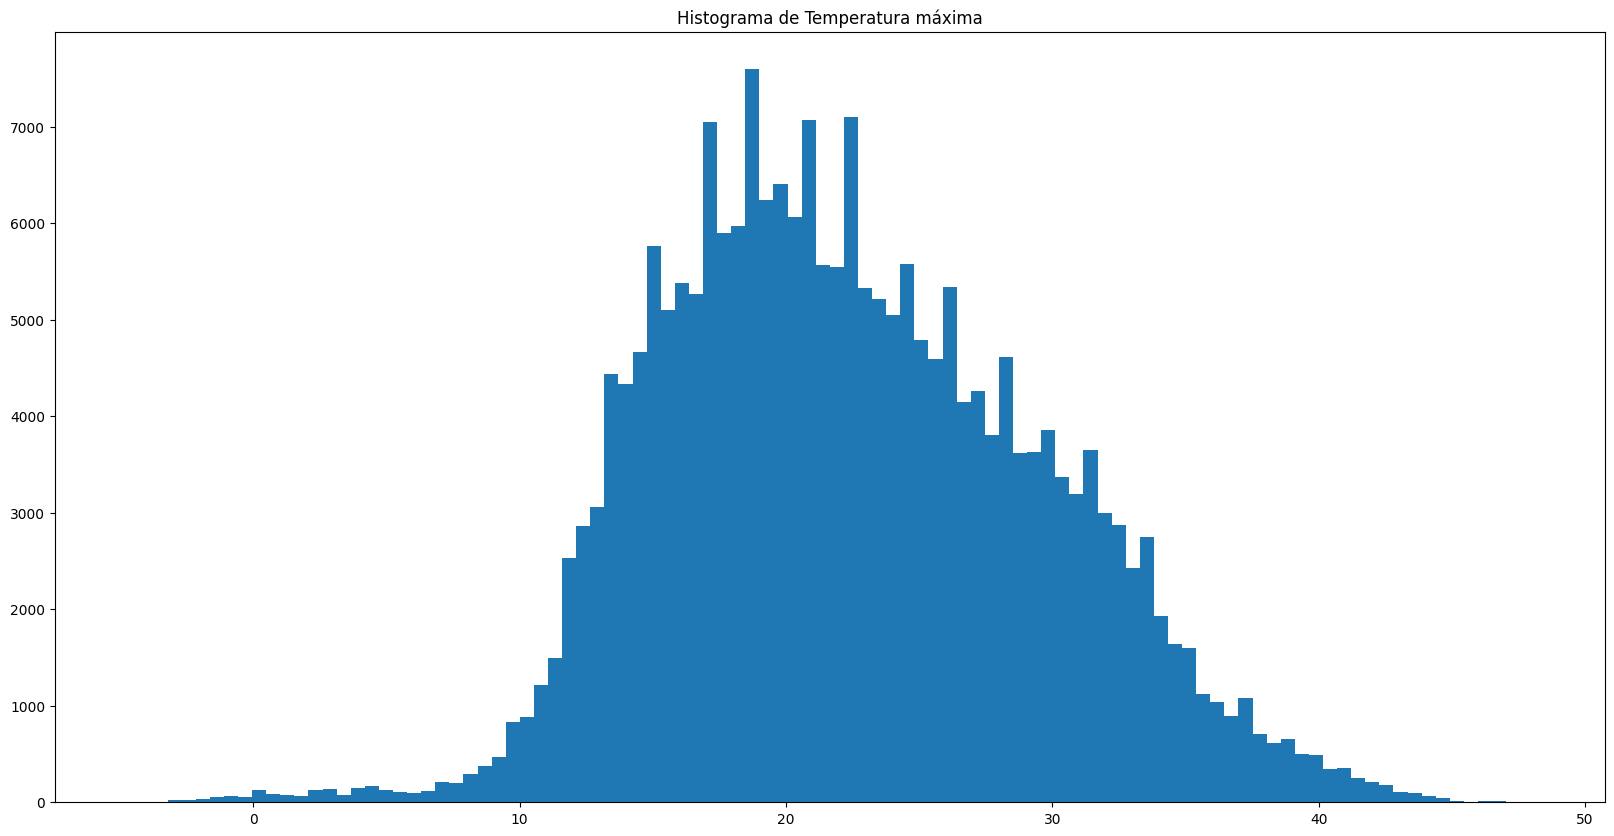

In [ ]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')



# Boxplot con matplotlib
plt.boxplot(dfimputado['MaxTemp'])
plt.title('Boxplot de Temperatura máxima')
plt.show()


# Histograma con matplotlib
plt.hist(dfimputado['MaxTemp'], bins=100)
plt.title('Histograma de Temperatura máxima')
plt.show()

Al ver nuestro gráfico de valores atipicos, podemos observar que la temperatura máxima promedio va desde los 18 grados hasta los 28 grados. El resto vienen a ser valores atipicos que no ocurren con tanta frecuencia

In [ ]:
# Detecting outliers with IQR
Q1 = dfimputado.quantile(0.25)
Q3 = dfimputado.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.200000
Rainfall            2.600000
Evaporation         1.131770
Sunshine            0.703243
WindGustDir         9.000000
WindGustSpeed      17.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.500000
Pressure3pm         8.600000
Cloud9am            2.000000
Cloud3pm            2.000000
Temp9am             9.200000
Temp3pm             9.600000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [ ]:
# Removemos los outliers de nuestro dataset
dfimputado = dfimputado[~((dfimputado < ( Q1- 1.5 * IQR)) |(dfimputado > (Q3 + 1.5 * IQR))).any(axis=1)]
dfimputado.shape

(71889, 24)

## Escalado de datos y seleccion de caracteristicas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()
# Aplicar la transformación de escala y crear el DataFrame escalado directamente
data_ready = pd.DataFrame(scaler.fit_transform(dfimputado), index=dfimputado.index, columns=dfimputado.columns)

In [ ]:
# Seleccion de las caracteristicas mas importantes usadno el metodo de filtro
from sklearn.feature_selection import SelectKBest, chi2
X = data_ready.loc[:,data_ready.columns!='RainTomorrow']
y = data_ready[['RainTomorrow']]
selector = SelectKBest(chi2, k=15)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


usamos este metodo para la seleccion de las caracteristcas ya que este es util cuando se busca una relación estadísticamente significativa entre las características y la variable objetivo. Por lo que es la que mejor se adapta a nuestro caso

# Fase 4 y 5: Modelado y Evaluacion

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report

In [ ]:
features = dfimputado[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = dfimputado['RainTomorrow']

In [ ]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de regresión logística
logistic_regression_model = LogisticRegression()

# Entrenar el modelo
logistic_regression_model.fit(X_train, y_train)

# Predecir utilizando el modelo entrenado
y_pred = logistic_regression_model.predict(X_test)

### reporte de clasificacion

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78     12698
         1.0       0.70      0.61      0.65      8869

    accuracy                           0.73     21567
   macro avg       0.73      0.72      0.72     21567
weighted avg       0.73      0.73      0.73     21567



### curva ROC

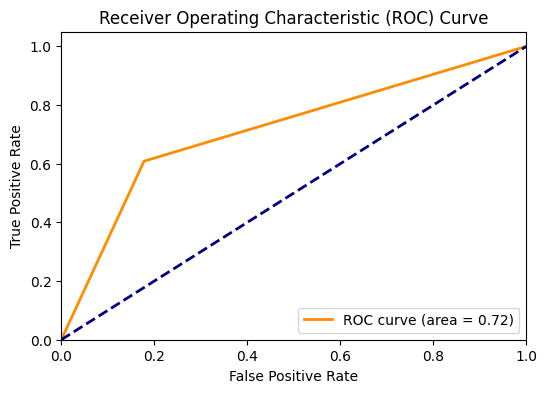

In [ ]:
# Calcula la tasa de falsos positivos (FPR), la tasa de verdaderos positivos (TPR) y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### matriz de confusion

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10438  2260]
 [ 3471  5398]]


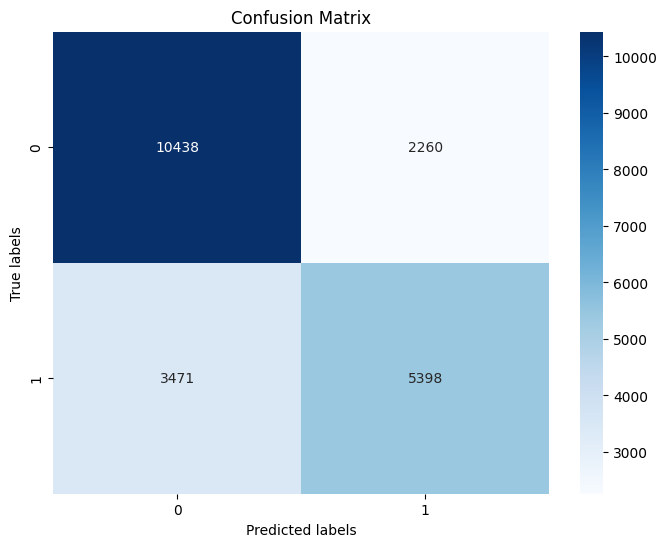

In [ ]:
import seaborn as sns

# Grafica la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo de regresión logística
random_forest_model = RandomForestClassifier(random_state=123)

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Predecir utilizando el modelo entrenado
y_pred_rf = random_forest_model.predict(X_test)

### reporte de clasificacion

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     12698
         1.0       0.92      0.95      0.93      8869

    accuracy                           0.94     21567
   macro avg       0.94      0.94      0.94     21567
weighted avg       0.94      0.94      0.94     21567



### curva ROC

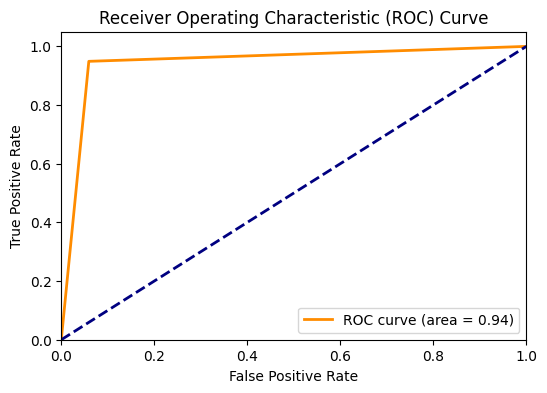

In [ ]:
# Calcula la tasa de falsos positivos (FPR), la tasa de verdaderos positivos (TPR) y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### matriz de confusion

In [ ]:
y_pred_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10438  2260]
 [ 3471  5398]]


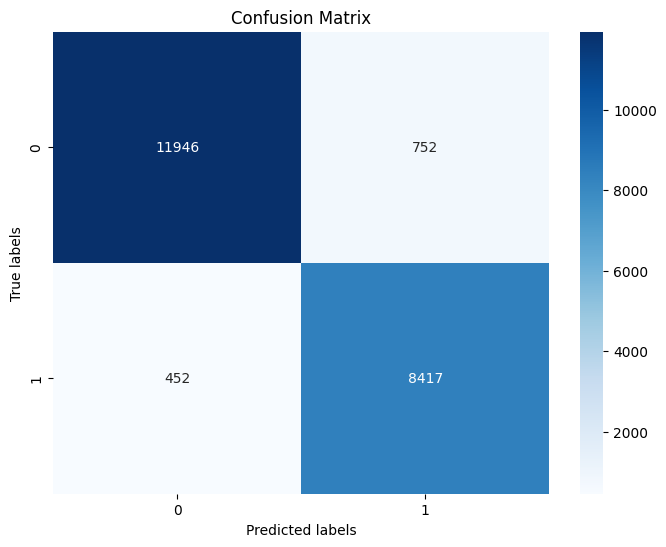

In [ ]:
import seaborn as sns

# Grafica la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(y_pred_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


## decision_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear una instancia del modelo de Árbol de Decisiones
decision_tree_model = DecisionTreeClassifier(random_state=12345)

# Entrenar el modelo
decision_tree_model.fit(X_train, y_train)

# Predecir utilizando el modelo entrenado
y_pred_dt = decision_tree_model.predict(X_test)

### reporte de clasificacion

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89     12698
         1.0       0.80      0.92      0.86      8869

    accuracy                           0.87     21567
   macro avg       0.87      0.88      0.87     21567
weighted avg       0.88      0.87      0.87     21567



### curva ROC

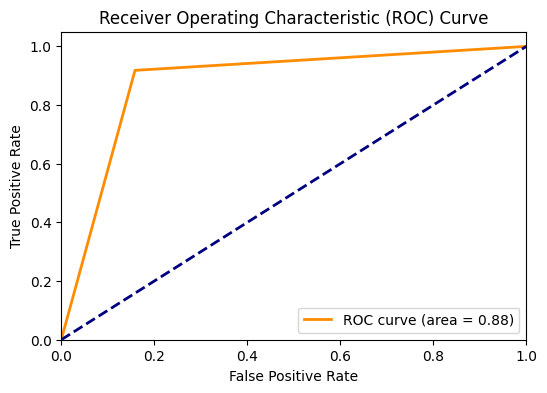

In [ ]:
# Calcula la tasa de falsos positivos (FPR), la tasa de verdaderos positivos (TPR) y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### matriz de confusion

In [ ]:
y_pred_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10438  2260]
 [ 3471  5398]]


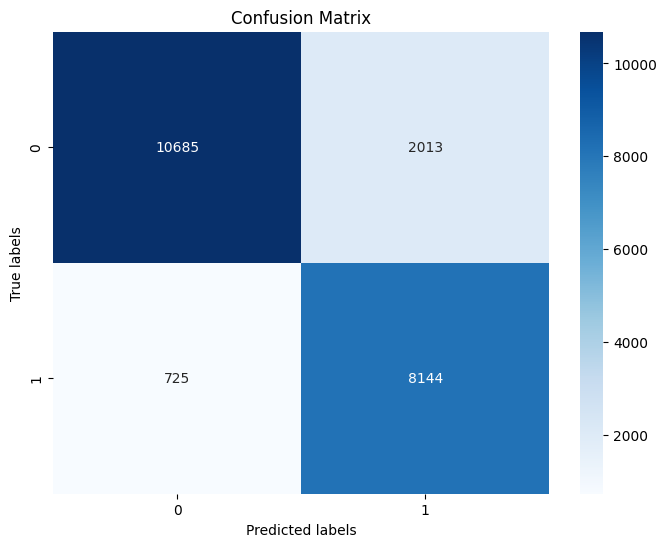

In [ ]:
import seaborn as sns

# Grafica la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(y_pred_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()
